<a href="https://colab.research.google.com/github/raj815patel/Stock-Prediction-Project/blob/main/Fin320_Learn_Machine_Learning_for_Finance_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn Machine Learning for Finance
by Raj Patel

Project 4

2 May  2021

Fin320-102

For this project python will be used to create a machine learning model to predict future price of Amazon stock. In this project I will try to teach and show how to make a simple machine learning model for finance. A machine learning model can do many things like predict and make recommendations. But a key thing in creating a machine learning model is having data. The more reliable and clean the data is the more accurate the model can predict. Also in some cases the more data being used to train the models the more accurate it can predict. In the process of developing in this model I will be importing data, cleaning the data, training and testing the model. Any unbalances or null values in your data set and throw your model prediction off. In this case since I am using stock data there isn't much data that needs to be cleaned and processed since primarily the close price data will be used. There are many different models to choose from, some models may perform better than others depending on your goal, but the model used in this project is called decision tree regressor.


In [ ]:
#Import libraries
import numpy as np 
import pandas as pd
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline


The code above is importing the necessary libraries for the project. Pandas will be used to build dataframes and retrieve data from yahoo finance. Numpy will be used to create arrays. Sklearn is an important library when trying to build machine learning models. Sklearn gives you the ability to train, test and create your models. Some other libraries that people opt to use for machine learning are Keras and TensorFlow. Lastly matplotlib is imported so we are able to see visual charts on our data and allow us to compare visually. Pandas data reader allows us to easily obtain stock information from yahoo finance. If our source of data were to be different such as an api, csv file, xlsx file, etc datareader is not necessary but pandas is a must. Pandas allows us to create dataframes which organizes our data into a table like format. A data frame has rows and columns and you can alter those rows and columns with python functions.

In [ ]:
#Load Data 
df =web.get_data_yahoo('amzn',start='2020-4-25',end='2021-4-26')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-27,2444.879883,2363.000000,2443.199951,2376.000000,5645600,2376.000000
2020-04-28,2373.500000,2306.000000,2372.100098,2314.080078,5269400,2314.080078
2020-04-29,2391.889893,2310.000000,2330.010010,2372.709961,4591600,2372.709961
2020-04-30,2475.000000,2396.010010,2419.840088,2474.000000,9534600,2474.000000
2020-05-01,2362.439941,2258.189941,2336.800049,2286.040039,9772600,2286.040039



The data is getting retrieved in the code above. The data is from yahoo finance. Amazon stock is the stock that is going to be used for the model and 1 year worth of Amazon stock data is being used. Also the head of the dataframe just to make sure everything looks good in the dataframe.
Putting the data into a dataframe will make it easier to manipulate the data later.

In [ ]:
# Number of Trading Days
df.shape

(252, 6)

df.shape gives the shape of the dataframe. So we have 252 rows and 6 columns. The 252 rows reflects on how many days we are working with. Since I am working with a year of the data, I get 252 since trading only takes place on weekdays and is halted for holidays. Therefore the model will be working 252 days of stock information. The columns holds information about the stock high, low, open, close, volume, and adj close. For this model close price will only be used. 

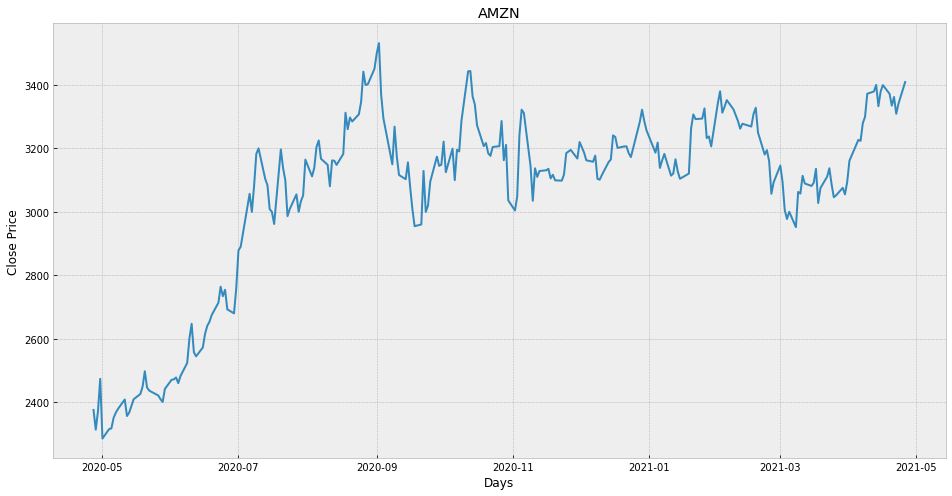

In [ ]:
#Graph Close Price Data 
plt.figure(figsize=(16,8))
plt.title('AMZN')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In the code above matplotlib is used to plot the Amazon stock on a graph. The days are the x axis and the close price is the y axis. The chart shows the close price of the Amazon stock from the start and end date we defined above. There are 252 closing prices plotted on the graph. This graph will be important when comparing to our model predictions since it will give a visual representation of the actual closing price vs what the model prediction of the close price. Having a visual is beneficial to see how the previous data is represented and how the model will predict accurately.


In [ ]:
# Get Close Price
df=df[['Close']]
df.head()

,Close
Date,
2020-04-27,2376.000000
2020-04-28,2314.080078
2020-04-29,2372.709961
2020-04-30,2474.000000
2020-05-01,2286.040039


since we are working with only the closing price of the stock we do not need all the other columns. In the code above we set the dataframe(df) equal to just the closing price column of the dataframe. So now every time (df) is called only the closing price will be shown, not the open, high, low, since we do not need those columns. Putting the data into a dataframe allowed us to manipulate the data frame for our model. 

In [ ]:
#Create Variable To Predict 'x' days out into the Future 
future_days=25 
#Create Column (target) shifted 'x' days up
df['Prediction']=df[['Close']].shift(-future_days)
df.tail()

,Close,Prediction
Date,,
2021-04-20,3334.689941,NaN
2021-04-21,3362.020020,NaN
2021-04-22,3309.040039,NaN
2021-04-23,3340.879883,NaN
2021-04-26,3409.000000,NaN


In the code above a variable is created called future_days which will predict 25 days into the future. This variable will be used to reflect the number of days the model will predict into the future. In the df dataframe a new column is created which will reflect the target data. The prediction column that was added is to predict future values away from the current price. The .shift() function is used to shift/move then index by a set number. Since we want to predict future prices, the - is put in front of future_days to shift at the most recent price. If the - is not put it would shift starting from the top of the dataframe or at the start of the data. Essentially, we are making the 25 most recent close price dates prediction set to NaN or blank. In this model it will predict the last 25 days from 4/1/2021-4/26/2021. We do know the actual closing price of the stock during those times but the model will act like it does not know. This way we can compare the model predictions to the actual price and see how accurate the model predicted. In most cases you can opt to improve the model but I will not be doing this for the project.

In [ ]:
#Create Feature Data Set (X) and convert it to a numpy array and remove last 'x'days/rows
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[2376.        ]
 [2314.08007812]
 [2372.70996094]
 [2474.        ]
 [2286.04003906]
 [2315.98999023]
 [2317.80004883]
 [2351.26000977]
 [2367.61010742]
 [2379.61010742]
 [2409.        ]
 [2356.94995117]
 [2367.91992188]
 [2388.85009766]
 [2409.7800293 ]
 [2426.26000977]
 [2449.33007812]
 [2497.93994141]
 [2446.73999023]
 [2436.87988281]
 [2421.86010742]
 [2410.38989258]
 [2401.10009766]
 [2442.37011719]
 [2471.04003906]
 [2472.40991211]
 [2478.39990234]
 [2460.60009766]
 [2483.        ]
 [2524.06005859]
 [2600.86010742]
 [2647.44995117]
 [2557.95996094]
 [2545.02001953]
 [2572.67993164]
 [2615.27001953]
 [2640.97998047]
 [2653.97998047]
 [2675.01000977]
 [2713.82006836]
 [2764.40991211]
 [2734.39990234]
 [2754.58007812]
 [2692.87011719]
 [2680.37988281]
 [2758.82006836]
 [2878.69995117]
 [2890.30004883]
 [3057.04003906]
 [3000.12011719]
 [3081.11010742]
 [3182.62988281]
 [3200.        ]
 [3104.        ]
 [3084.        ]
 [3008.87011719]
 [2999.89990234]
 [2961.9699707 ]
 [3196.8400878

Here a feature dataset is being created as a numpy array. The df.drop() is used to drop the 'Prediction' column so we only remain with the close price column. Since we are predicting the last 25 days or future_days from the stock data we want all of the rows besides future_days that is why the - is put in the front. We do know the actual price of those 25 days but it is taken out so the model is able to predict those days and able to compare it to the actual price.

In [ ]:
#Create Target Data Set(y) and convert it to a numpy array and get all of the target values except the last 'x' rows 
y = np.array(df['Prediction'])[:-future_days]
print(y)

[2472.40991211 2478.39990234 2460.60009766 2483.         2524.06005859
 2600.86010742 2647.44995117 2557.95996094 2545.02001953 2572.67993164
 2615.27001953 2640.97998047 2653.97998047 2675.01000977 2713.82006836
 2764.40991211 2734.39990234 2754.58007812 2692.87011719 2680.37988281
 2758.82006836 2878.69995117 2890.30004883 3057.04003906 3000.12011719
 3081.11010742 3182.62988281 3200.         3104.         3084.
 3008.87011719 2999.89990234 2961.9699707  3196.84008789 3138.29003906
 3099.90991211 2986.55004883 3008.90991211 3055.20996094 3000.33007812
 3033.5300293  3051.87988281 3164.67993164 3111.88989258 3138.83007812
 3205.0300293  3225.         3167.45996094 3148.15991211 3080.66992188
 3162.23999023 3161.02001953 3148.02001953 3182.40991211 3312.48999023
 3260.47998047 3297.37011719 3284.7199707  3307.45996094 3346.48999023
 3441.85009766 3400.         3401.80004883 3450.95996094 3499.12011719
 3531.44995117 3368.         3294.62011719 3149.84008789 3268.61010742
 3175.11010742

Next a target data set is created. This data is using the 'Predictions' column as the data and is converted into a numpy array. Again we do not include the future_days of 25 so -future_days is used in the dataset so the model can predict on those days. The target data set is the target prices of the data. 

In [ ]:
#Split data into 75% training and 25% testing
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25)

Here is the first step in creatin the actual machine leanring model. The data set is split to determine how much data is going to be used to train the model and how much data is going to be used to test the model. test_size is set .25 so 25% of the data will be used for testing and the rest of the data will be used to train the model. Depending on your circumstance and goal you can adjust this to your needs. But since we want to have a good amount of data to work with and train the model 75% will be used for train which is a good amount. 

In [ ]:
#Create the models
#Create decison tree regressor model 
tree = DecisionTreeRegressor().fit(x_train,y_train)


In the code above the model is being made and fitted. The model that is being used is a DecisionTreeRegressor model. It will take in the x_train and y_train we set above. A DecisionTreeRegressor is a type of decision tree. It splits into smaller and smaller subsets. In a decision tree there are leaf nodes and leaf nodes. A decision node has two or more branches of classification. A lead mode represents a decision on a numerical target. Also the topmost decision in the tree is called the root node. A decision tree is a great model that can be applied to not only stock data but other data has a lot of factors in decision making.

In [ ]:
#Get last x rows of the feature dataset
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[3277.70996094],
       [3268.94995117],
       [3308.63989258],
       [3328.22998047],
       [3249.89990234],
       [3180.73999023],
       [3194.5       ],
       [3159.5300293 ],
       [3057.15991211],
       [3092.92993164],
       [3146.13989258],
       [3094.5300293 ],
       [3005.        ],
       [2977.57006836],
       [3000.45996094],
       [2951.94995117],
       [3062.85009766],
       [3057.63989258],
       [3113.59008789],
       [3089.48999023],
       [3081.67993164],
       [3091.86010742],
       [3135.72998047],
       [3027.98999023],
       [3074.95996094]])

Here the x_future is created from the feature dataset which is the dataset with the original stock closing prices with the prediction column dropped. Since we only want the last x rows or the future_days of the dataset set the tail() function is called to get the data from the the bottom of the dataset. Finally it is created into a numpy array.

In [ ]:
#Show model tree prediction 
tree_prediction =tree.predict(x_future)
print(tree_prediction)
print()

[3110.87011719 3137.5        3087.07006836 3046.26000977 3052.0300293
 3075.72998047 3055.29003906 3094.08007812 3161.         3226.72998047
 3223.82006836 3279.38989258 3299.30004883 3372.19995117 3499.12011719
 3400.         3333.         3379.09008789 3399.43994141 3372.01000977
 3162.23999023 3362.02001953 3309.04003906 3340.87988281 3409.        ]



In the code above a tree_prediction variable is made and the variable is predicting the future values in x_values. tree.predict =() is a function that predicts values within the given period. the tree.predict() is used when working with the DecisionTreeRegressor model. The "tree" variable is called which is the model that was created earlier. The model is then called on the predict function to make a prediction on our data. The data points resulted in the function are the stock closing prices the model had predicted. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


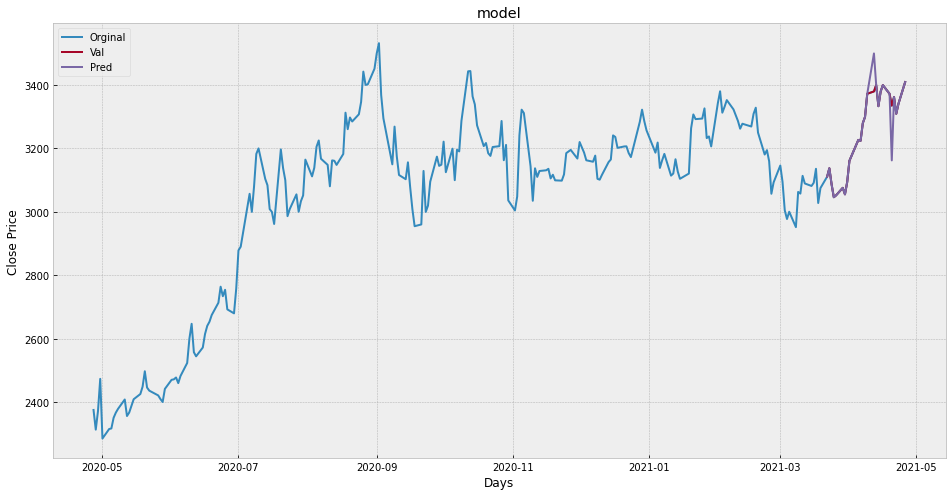

In [ ]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orginal','Val','Pred'])
plt.show()

After the model is set up and running, plotting it on a graph is the best way to visualize it and see the results. In the graph the blue line is the past value of the stock. The purple line is what the model predicted about the stock price and the red line is the actual value of the stock in the same time period the model is predicting at. So the best way to analyze the graph is to look at the red line and the purple line. Looking at the graph the model seemed to predict in the overall right direction of the actual closing prices. There are so many values that are inaccurate but that is part of creating a machine learning model. Trying to predict future values of stock is near impossible since there are many factors in play that manipulate a stock price. Overall the model created was accurate in predicting the overall direction of the stock price. Creating machine learning models can be as simple as  this or even 10x more complex. There are many different types of models that can be created in sklearn. Some models perform better than others but it all depends on what information and data is given to the model. Machine learning for finance is an innovative way for firms to determine how to place their assets. 20-30 years ago there was no implementation of machine learning in finance. Now there are many positions that focus on using machine learning models in finance such as a quantitative analyst. The uses of machine learning in finance are endless.


